<a href="https://colab.research.google.com/github/ShreyJais/Quantum-Computing/blob/main/2348558_QC_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install qiskit

In [28]:
!pip install qiskit_aer

In [29]:
!pip install pylatexenc

In [30]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import state_fidelity, Statevector
import matplotlib.pyplot as plt
from qiskit.circuit.library import UGate
from numpy import pi, random
from qiskit.result import marginal_distribution

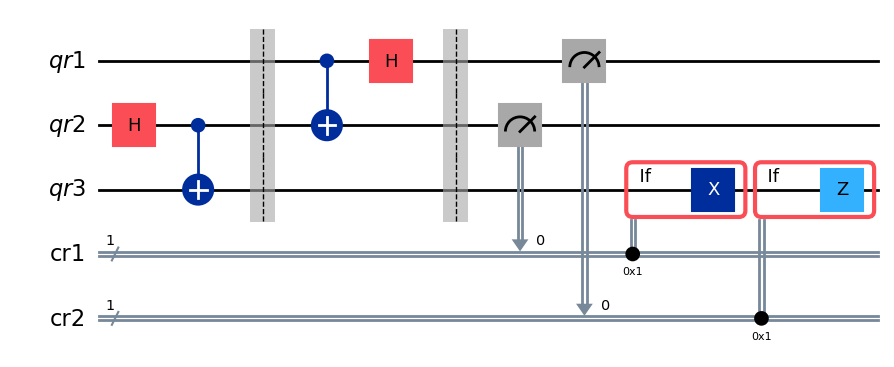

In [31]:
qr1 = QuantumRegister(1, name='qr1')
qr2 = QuantumRegister(1, name='qr2')
qr3 = QuantumRegister(1, name='qr3')
cr1 = ClassicalRegister(1, name='cr1')
cr2 = ClassicalRegister(1, name='cr2')
qc = QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
# a) Implement quantum gates using teleportation
qc.h(qr2)
qc.cx(qr2,qr3)
qc.barrier()
# b) Use the barrier function to create visual separation

qc.cx(qr1,qr2)
qc.h(qr1)
qc.barrier()

qc.measure(qr2,cr1)
qc.measure(qr1,cr2)

with qc.if_test((cr1,1)):
    qc.x(qr3)
with qc.if_test((cr2,1)):
    qc.z(qr3)
display(qc.draw(output='mpl'))

In [32]:
#random inputs for the circuit
random_gate = UGate(
    theta = random.random() * 2 * np.pi,
    phi = random.random() * 2 * np.pi,
    lam = random.random() * 2 * np.pi
)
display(random_gate.to_matrix())

array([[ 0.82941333+0.j        ,  0.200935  -0.52124721j],
       [ 0.37877274+0.41061507j, -0.77112126+0.30544799j]])

In [33]:
# c) Test that the protocol works correctly for different state vectors
test = QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
test.append(random_gate,qr1)
test.barrier()

test = test.compose(qc)
test.barrier()

test.append(random_gate.inverse(),qr3)

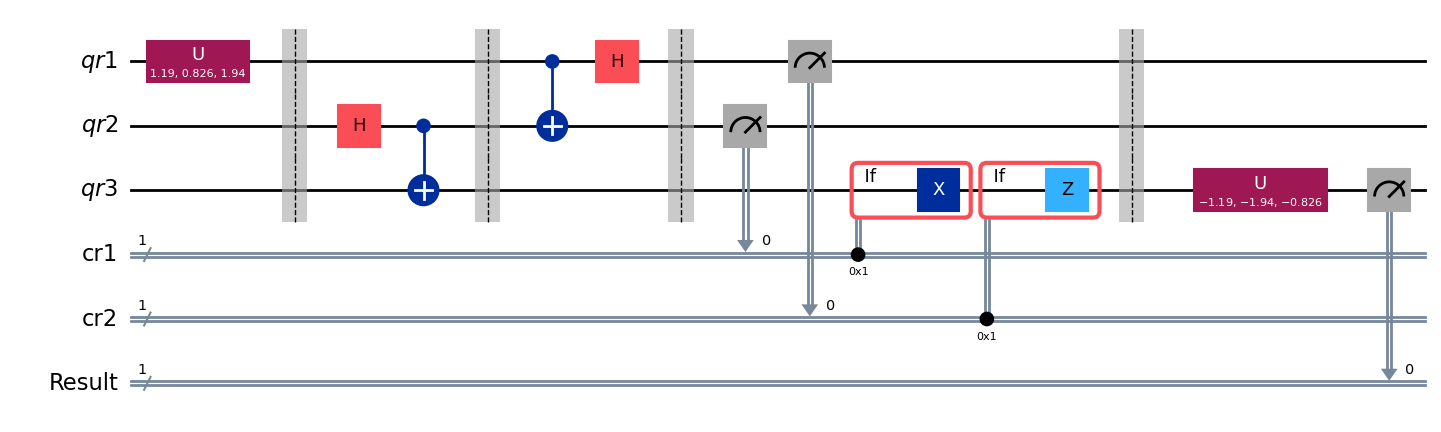

In [34]:
result = ClassicalRegister(1, name='Result')
test.add_register(result)
test.measure(qr3,result)
display(test.draw(output='mpl'))

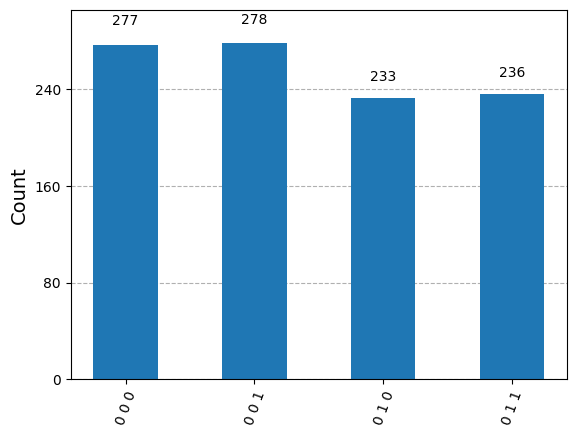

In [35]:
result = AerSimulator().run(test).result()
counts = result.get_counts()
plot_histogram(counts)

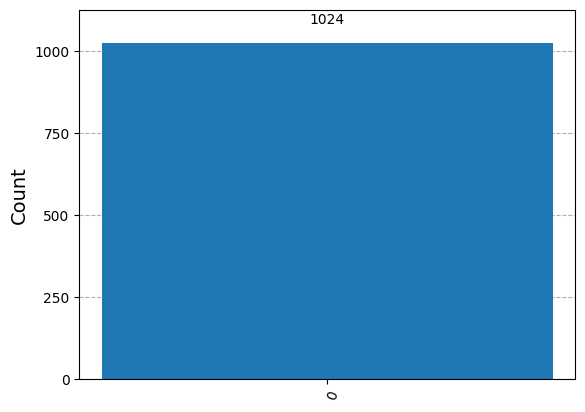

In [36]:
filtered_statistics = marginal_distribution(counts, [2])
display(plot_histogram(filtered_statistics))